In [2]:
import pandas as pd
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('assets/Pokemon.csv')

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [24]:
types = df['Type 1'].unique() # num unique types
print(types)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [9]:
df[df['Generation'] == 1].count() # pokemon in First Generation

#             166
Name          166
Type 1        166
Type 2         78
Total         166
HP            166
Attack        166
Defense       166
Sp. Atk       166
Sp. Def       166
Speed         166
Generation    166
Legendary     166
dtype: int64

In [17]:
df[df['Generation'] == 1].describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0
mean,75.819277,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,1.0
std,45.153246,115.878076,28.153968,30.744727,28.641336,34.439106,25.505275,29.675857,0.0
min,1.000000,195.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.0
25%,36.250000,325.000000,46.500000,55.000000,50.000000,45.000000,50.000000,50.000000,1.0
50%,76.500000,436.500000,62.000000,75.000000,66.000000,65.000000,70.000000,70.000000,1.0
75%,115.000000,500.000000,80.000000,95.000000,85.000000,95.000000,85.000000,92.250000,1.0
max,151.000000,780.000000,250.000000,190.000000,180.000000,194.000000,130.000000,150.000000,1.0


In [16]:
df.sort_values('Attack', ascending=False).head(10) 
# Pokemon with highest attack

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
387,354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
454,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False


In [23]:
# Get average Attack for each generation of pokemon
for i in range(1,7):
    print('Generation ' + str(i) + ': ' + str(df[df['Generation'] == i]['Attack'].mean()))

Generation 1: 76.63855421686748
Generation 2: 72.02830188679245
Generation 3: 81.625
Generation 4: 82.86776859504133
Generation 5: 82.06666666666666
Generation 6: 75.8048780487805


In [27]:
# Get average total for each type
for pk_type in types:
    print(pk_type + ': ' + str(df[df['Type 1'] == pk_type]['Total'].mean()))

Grass: 421.14285714285717
Fire: 458.0769230769231
Water: 430.45535714285717
Bug: 378.92753623188406
Normal: 401.68367346938777
Poison: 399.14285714285717
Electric: 443.40909090909093
Ground: 437.5
Fairy: 413.1764705882353
Fighting: 416.44444444444446
Psychic: 475.94736842105266
Rock: 453.75
Ghost: 439.5625
Ice: 433.4583333333333
Dragon: 550.53125
Dark: 445.741935483871
Steel: 487.7037037037037
Flying: 485.0


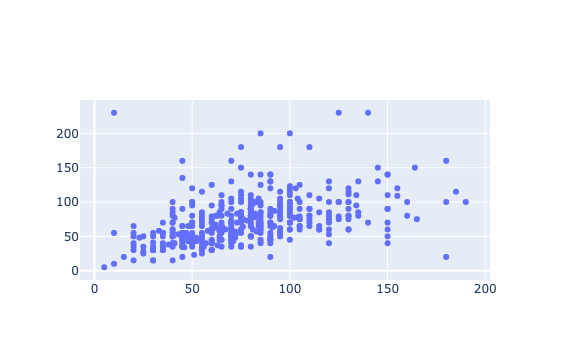

In [9]:
# Attack/defense of first 3 generations
scatter = go.Scatter(
    x = df[df['Generation'] < 4]['Attack'],
    y = df[df['Generation'] < 4]['Defense'],
    mode='markers'
)
fig = go.Figure(data=scatter);
fig.show()

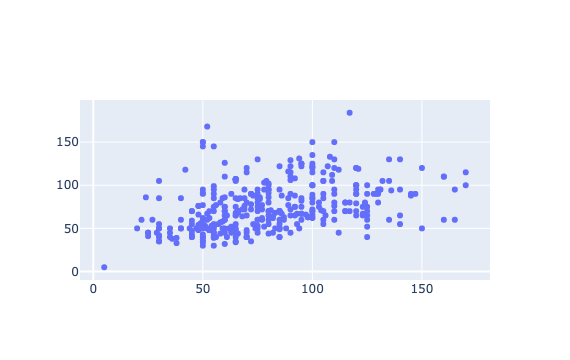

In [10]:
# Attack/defense of generations 4-6
scatter = go.Scatter(
    x = df[df['Generation'] >= 4]['Attack'],
    y = df[df['Generation'] >= 4]['Defense'],
    mode='markers'
)
fig2 = go.Figure(data=scatter);
fig2.show()

In [11]:
# Get the legendary pokemon
legendaries = df[df['Legendary'] == True]
legendaries.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


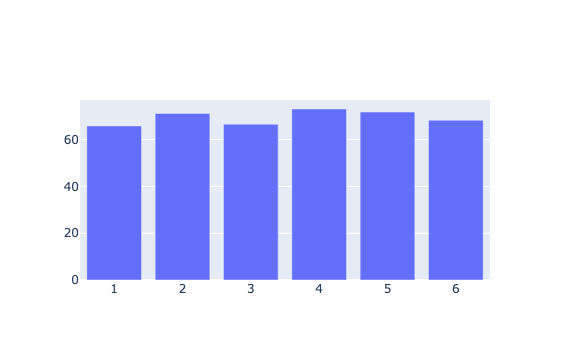

In [15]:
# graph average HP of each generation
grouped_data = df.groupby('Generation')
totals = pd.DataFrame(grouped_data.mean()['HP'])

barchart = go.Bar(
    x = totals.index,
    y = totals['HP']
)

fig3 = go.Figure(data=barchart)
fig3.show()

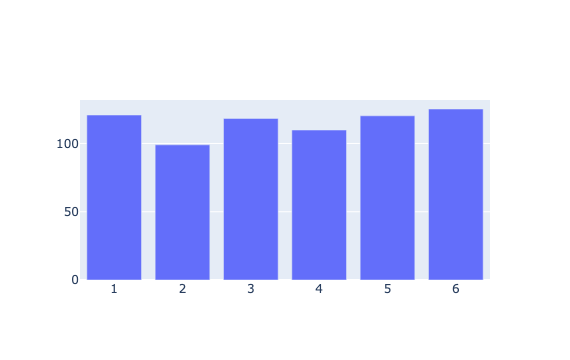

In [17]:
# graph average attack of legendaries in each generation
grouped_data = legendaries.groupby('Generation')
totals = pd.DataFrame(grouped_data.mean()['Attack'])

barchart = go.Bar(
    x = totals.index,
    y = totals['Attack']
)

fig3 = go.Figure(data=barchart)
fig3.show()